In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install scikit-learn==1.3.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df=df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df["Species"]=df["Species"].str.replace("Iris-","")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

<Axes: >

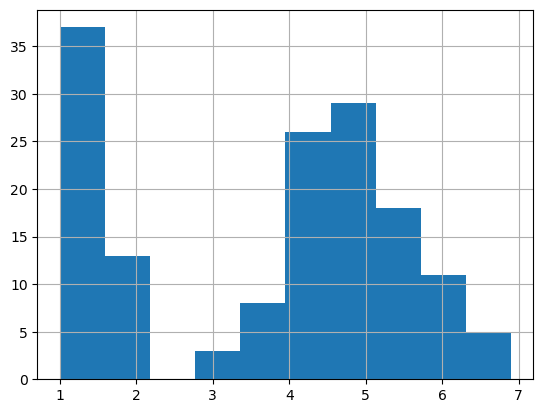

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

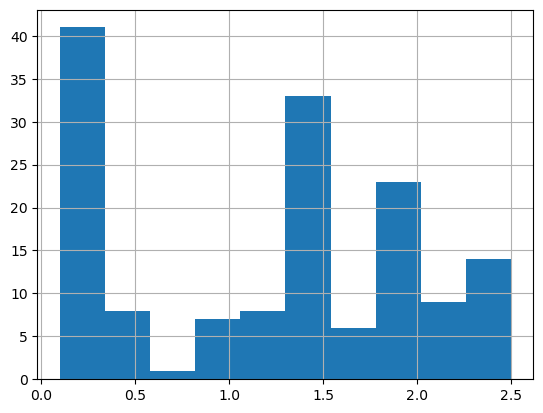

In [12]:
df["PetalWidthCm"].hist()

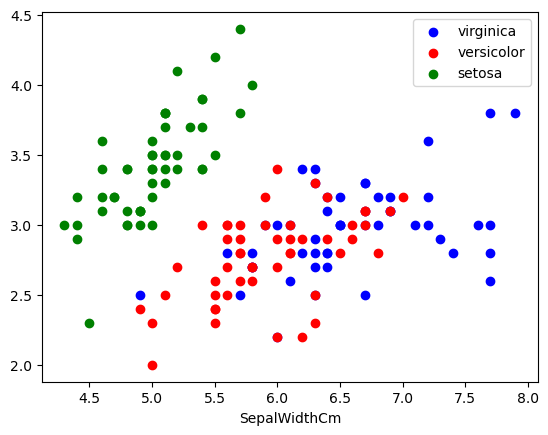

In [13]:
col=["blue",'red',"green"]
spe=['virginica','versicolor','setosa']
for i in range(3):
    x=df[df["Species"]==spe[i]]
    plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],c=col[i],label=spe[i])
plt.xlabel("SepalLengthCm")
plt.xlabel("SepalWidthCm")
plt.legend()

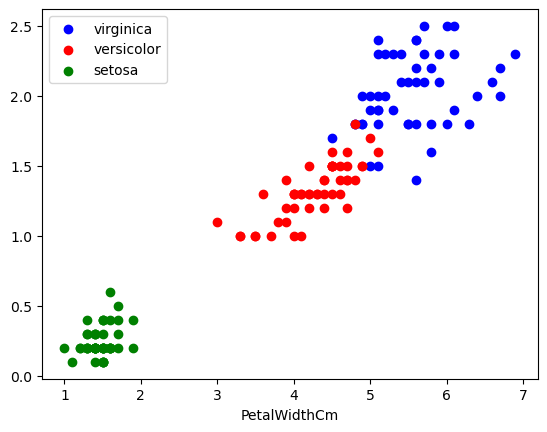

In [14]:
for i in range(3):
    x=df[df["Species"]==spe[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],c=col[i],label=spe[i])
plt.xlabel("PetalLengthCm")
plt.xlabel("PetalWidthCm")
plt.legend()

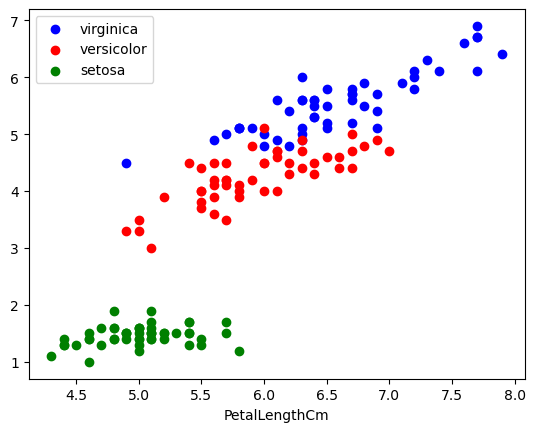

In [15]:
for i in range(3):
    x=df[df["Species"]==spe[i]]
    plt.scatter(x["SepalLengthCm"],x["PetalLengthCm"],c=col[i],label=spe[i])
plt.xlabel("SepalLengthCm")
plt.xlabel("PetalLengthCm")
plt.legend()

Lable Encoder

In [16]:
#from sklearn import preprocessing 

#label_encoder = preprocessing.LabelEncoder() 

#df['Species']= label_encoder.fit_transform(df['Species']) 

#df['Species'].unique()

In [17]:
cor=df.corr()
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

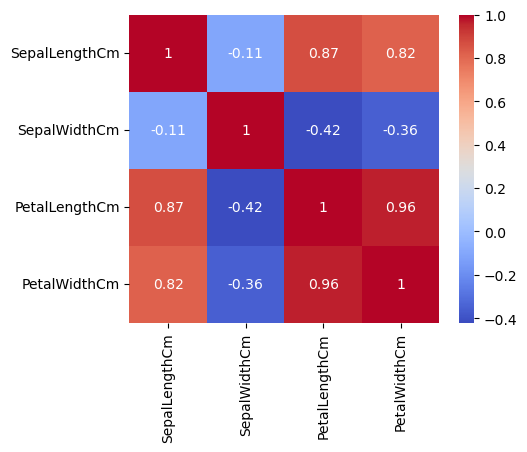

In [18]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df.drop(columns=["Species"])
Y=df["Species"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy:",model.score(x_test,y_test)*100)

Logistic Regression Accuracy: 100.0


In [37]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("k Accuracy:",model.score(x_test,y_test)*100)

k Accuracy: 100.0


In [22]:
import pickle
file="saved_model.sav"
pickle.dump(model,open(file,"wb"))

In [23]:
load_model=pickle.load(open(file,"rb"))

In [24]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['versicolor'], dtype=object)

In [25]:
 x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [26]:
load_model.predict([[6.6,3.0,4.4,1.4]])

array(['versicolor'], dtype=object)

In [27]:
load_model.predict([[1.2,3.0,4.4,1.4]])

array(['versicolor'], dtype=object)